In [41]:
import sunpy.map

aia_map = sunpy.map.Map("./observations/aia_lev1_171a_2012_07_19t10_14_11_34z_image_lev1.fits") 


In [42]:
from sunpy.coordinates import frames

time = aia_map.reference_coordinate.obstime
hgs_frame = frames.HeliographicStonyhurst(obstime=time)
hgs_frame

<HeliographicStonyhurst Frame (obstime=2012-07-19T10:14:11.340, rsun=695700.0 km)>

In [43]:
import astropy.units as u
from astropy.coordinates import SkyCoord
import astropy.constants as const

r_1 = const.R_sun
lat = -14*u.deg
lon = 91*u.deg

# lon, lat, radius
hgs_coord = SkyCoord(lon=lon, lat=lat, radius=r_1, frame=hgs_frame)  # longitude, latitude, and distance from the origin
hgs_coord

<SkyCoord (HeliographicStonyhurst: obstime=2012-07-19T10:14:11.340, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (91., -14., 6.957e+08)>

In [44]:
hgs_coord_xyz = SkyCoord(hgs_coord, representation_type='cartesian')
hgs_coord_xyz

<SkyCoord (HeliographicStonyhurst: obstime=2012-07-19T10:14:11.340, rsun=695700.0 km): (x, y, z) in m
    (-11780980.58539838, 6.74931926e+08, -1.68305063e+08)>

In [45]:
aia_coord = aia_map.observer_coordinate
aia_coord_xyz = SkyCoord(aia_coord, representation_type='cartesian')
aia_coord_xyz

<SkyCoord (HeliographicStonyhurst: obstime=2012-07-19T10:14:11.340, rsun=696000.0 km): (x, y, z) in m
    (1.51521828e+11, 33538843.27385139, 1.26549339e+10)>

In [46]:
x = [aia_coord_xyz.x, hgs_coord_xyz.x]
y = [aia_coord_xyz.y, hgs_coord_xyz.y]
z = [aia_coord_xyz.z, hgs_coord_xyz.z]

x, y, z


([<Quantity 1.51521828e+11 m>, <Quantity -11780980.58539838 m>],
 [<Quantity 33538843.27385139 m>, <Quantity 6.74931926e+08 m>],
 [<Quantity 1.26549339e+10 m>, <Quantity -1.68305063e+08 m>])

In [47]:
from sunpy.coordinates import Heliocentric

hcc_frame = Heliocentric(observer=SkyCoord(
        lon=lon, lat=lat, radius=r_1, frame='heliographic_stonyhurst'))

los = SkyCoord(
    x=x, 
    y=y, 
    z=z, 
    frame=hcc_frame
)

los

<SkyCoord (Heliocentric: obstime=None, observer=<HeliographicStonyhurst Coordinate (obstime=None, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (91., -14., 6.957e+08)>): (x, y, z) in m
    [( 1.51521828e+11, 3.35388433e+07,  1.26549339e+10),
     (-1.17809806e+07, 6.74931926e+08, -1.68305063e+08)]>

In [69]:
mpt = SkyCoord(lon=lon, lat=lat, radius=const.R_sun,
                        frame='heliographic_stonyhurst',
                        observer='earth', obstime=aia_map.reference_coordinate.obstime). \
                        transform_to(frame='helioprojective')
mpt
mpt_pix = aia_map.wcs.world_to_pixel(mpt)
mpt_pix


(array(3587.38352173), array(1667.27859202))

In [70]:
aia_coord = aia_map.observer_coordinate
aia_coord

mpt_pix = aia_map.wcs.world_to_pixel(aia_coord)
mpt_pix


(array(1.28437675e+19), array(5.60809477e+21))

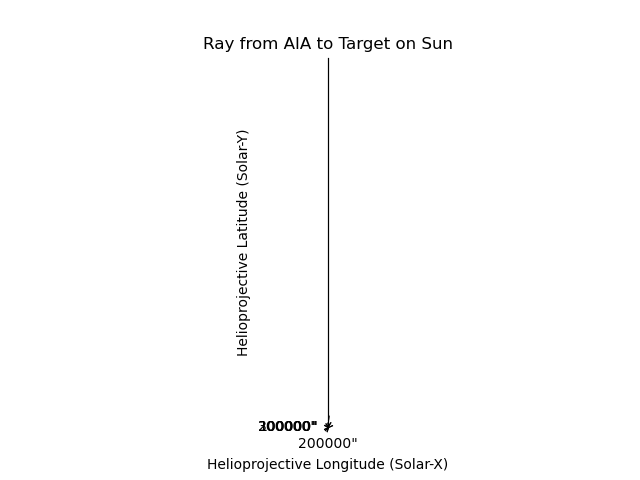

In [71]:
%matplotlib widget
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)
aia_map.plot(axes=ax)
# ax.plot_coord(los, color='r', lw=2)
ax.plot(mpt_pix[0], mpt_pix[1], 'or')

ax.set_title("Ray from AIA to Target on Sun")
plt.show()

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


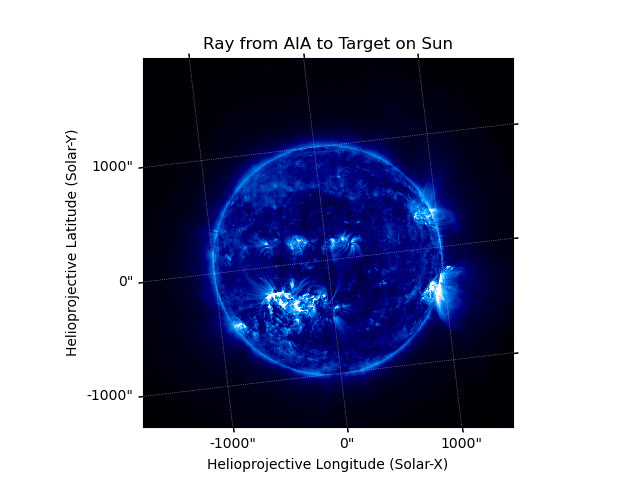

In [72]:
stereo_map = sunpy.map.Map("./observations/20120719_101400_n4eua.fts") 

fig = plt.figure()
ax = fig.add_subplot(projection=stereo_map)
stereo_map.plot(axes=ax)
# ax.plot_coord(los, color='r', lw=2)

ax.set_title("Ray from AIA to Target on Sun")
plt.show()